# **Machine Learning II: Deep learning classifiers for urban sound data**
<img src="images/portrait.png" alt="Portrait" style="width:100%; height:auto;">

===================================================================================================================


## **Introduction**
Urban sound recognition is a crucial component in the development of intelligent systems for cities, supporting applications in public safety, environmental monitoring, and transportation. This project focuses on designing and evaluating deep learning classifiers for recognizing urban sounds using the UrbanSound8K dataset. This dataset contains audio samples across 10 classes commonly found in urban environments, such as "siren," "dog bark," and "street music." To address the classification challenge, we implement two neural network architectures: a **Recurrent Neural Network (RNN)**, which leverages temporal patterns in audio data, and a **Multilayer Perceptron (MLP)**, which classifies extracted features based on dense, fully connected layers. By comparing these models, we aim to identify which architecture is more effective in urban sound classification tasks, balancing accuracy, computational efficiency, and model complexity.


### **Abstract**

This project presents a deep learning approach for urban sound classification, utilizing the UrbanSound8K dataset to train and evaluate two neural network models: a Recurrent Neural Network (RNN) and a Multilayer Perceptron (MLP). Our data preparation pipeline applies comprehensive preprocessing steps, including signal normalization and feature extraction, to transform raw audio signals into structured representations suitable for deep learning input. Model architectures are iteratively optimized through careful adjustment of layer configurations, activation functions, and hyperparameters to enhance performance. 
Training strategies incorporate fine-tuning of optimizers, regularization techniques, and a robust 10-fold cross-validation approach to ensure reliable generalization and mitigate overfitting. Model performance is evaluated using classification accuracy and a cumulative confusion matrix across folds, providing insight into each model’s ability to handle distinct sound classes.

Training strategies included fine-tuning of optimizers and regularization techniques, alongside a robust **10-fold cross-validation** to assess generalization. Classification performance is evaluated based on accuracy and the confusion matrix across folds, providing insights into each model's strengths in handling distinct sound classes. 

### **Objective of the work**
The primary objective of this project is to develop and assess the efficacy of two distinct neural network architectures—RNN and MLP—for urban sound classification. By conducting a comparative analysis, we aim to provide understanding of each model's performance, identifying the trade-offs in accuracy, computational demands, and architectural complexity. 

### **Structure of the work**
The project is structured into the following sections:
1. **Data Preparation**: This section outlines the steps taken to preprocess the UrbanSound8K dataset
2. **Model Architectures**: A detailed description of the RNN and MLP models...
    - **RNN Architecture**: ...
    - **MLP Architecture**: ...
3. **Training Strategies**: This section discusses the training approaches used for both models...
4. **Evaluation Metrics**: A description of the metrics used to evaluate model performance...
5. **Results and Discussion**: A presentation of the results obtained from the models, including accuracy and ...

## **Data Preparation**

In [10]:
############## LIBRARIES ###############
import soundata
import librosa
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import fnmatch


First, we will import the data, which is already installed in the following directory, the library **soundata** has an implementation which facilitates the process.

In [11]:
directory=r'D:\data\ml2'
dataset = soundata.initialize('urbansound8k', data_home=directory)


In [ ]:
dir_metadata=os.path.join(directory,"metadata","UrbanSound8k.csv")
data=pd.read_csv(dir_metadata)
data["fold"].value_counts()
data["class"].value_counts()

#Applying factorize function for the labels 
data['class'], uniques = pd.factorize(data['class'])
# Getting the originals 
# data['class'] = data['class'].apply(lambda x: uniques[x])


class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

## Feature Extraction

For our work with an Deep Learning models, it's essential to extract certain types of audio features, ensuring the model receives inputs it can effectively process. Using **librosa**,a library specifically designed to ha dle audio analysis, we can derive three main types of audio representations:

- **Waveform**: This a straightforward representation of sound,which captures the amplitude of an audio signal over time, offering a basic but crucial insight into the raw sound dynamics.

- **Spectrogram**: This visual format reveals how frequency components evolve over time, displaying changes in the sound's frequency structure.

- **Mel-Frequency Cepstral Coefficients (MFCCs)**: MFCCs are derived from the spectrogram but specifically designed to model human hearing. These coefficients compress the audio data while retaining its most perceptually relevant features

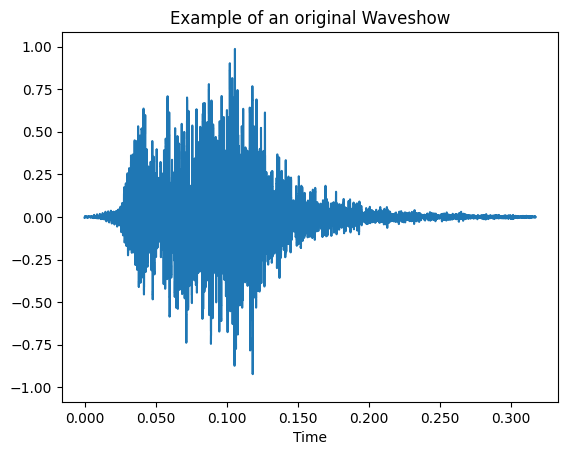

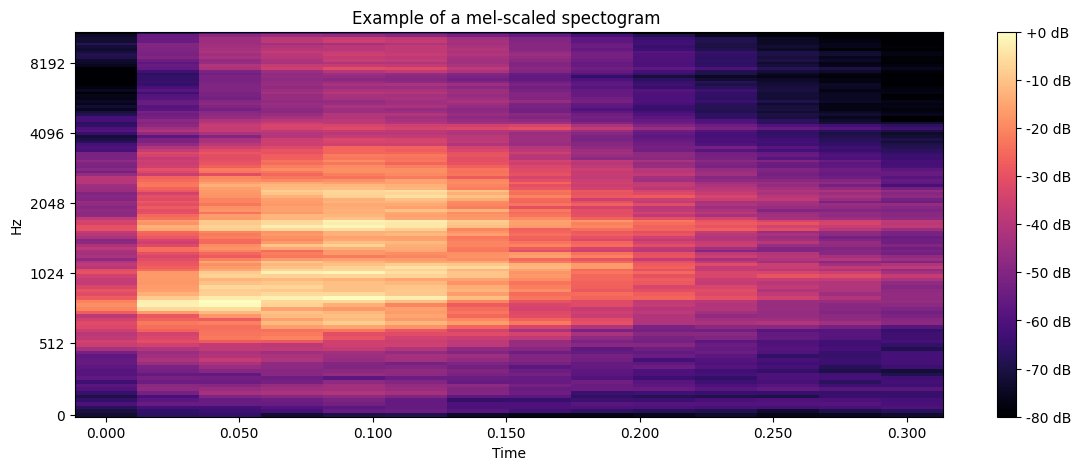

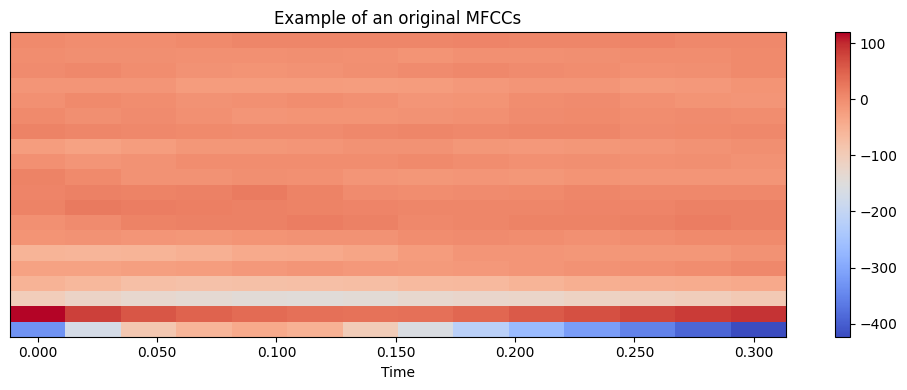

In [13]:
dir_audio_example=os.path.join(directory,"audio","fold5","100032-3-0-0.wav")

#Waveshow
y,sr=librosa.load(dir_audio_example)
librosa.display.waveshow(y, sr=sr)
plt.title('Example of an original Waveshow')
plt.show()

#MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128) 
mel_spectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Example of a mel-scaled spectogram ')
plt.show()

#MFCC 
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Example of an original MFCCs')
plt.tight_layout()


## Feature Extraction

For the training of the models, we will extract only the following characteristhics

In [ ]:
from utils import get_features,generate_train_set
train, test=generate_train_set(8)
df=get_features(os.path.join(directory,'audio','fold'),data)


audio_train=[]
X_train=[]
y_train=[]
X_test=[]
y_test=[]

for fold in train:
     
    for audio in os.listdir(dir_fold): 
        if fnmatch.fnmatch(audio, f'*wav'):
            audio_path = os.path.join(dir_fold, audio)  # Construye la ruta completa del archivo
            audio_train.append(audio)


102105-3-0-0.wav
103199-4-0-0.wav
103199-4-0-3.wav
103199-4-0-4.wav
103199-4-0-5.wav
103199-4-0-6.wav
103199-4-1-0.wav
103199-4-2-0.wav
103199-4-2-1.wav
103199-4-2-10.wav
103199-4-2-11.wav
103199-4-2-2.wav
103199-4-2-3.wav
103199-4-2-4.wav
103199-4-2-5.wav
103199-4-2-6.wav
103199-4-2-7.wav
103199-4-2-8.wav
103199-4-2-9.wav
103199-4-4-0.wav
103199-4-6-0.wav
103199-4-7-2.wav
103357-4-0-0.wav
103357-4-0-1.wav
107228-5-0-0.wav
107228-5-0-1.wav
107228-5-0-2.wav
107228-5-0-3.wav
107228-5-0-4.wav
107228-5-0-5.wav
107228-5-0-6.wav
107228-5-0-7.wav
110622-6-0-0.wav
112075-5-0-0.wav
112075-5-0-1.wav
112075-5-0-2.wav
115536-3-0-0.wav
116400-3-0-2.wav
116400-3-1-0.wav
116400-3-1-1.wav
116400-3-1-2.wav
117048-3-0-17.wav
117048-3-0-23.wav
117048-3-0-25.wav
117048-3-0-35.wav
117072-3-0-11.wav
117072-3-0-14.wav
117072-3-0-19.wav
117072-3-0-8.wav
118070-1-0-0.wav
118496-1-0-0.wav
118496-1-1-0.wav
118961-3-0-0.wav
121528-8-1-0.wav
121528-8-1-1.wav
123399-2-0-13.wav
123399-2-0-19.wav
123399-2-0-22.wav
12

# Recurrent Neural Networks

**Recurrent Neural Networks (RNNs)** is a type of neural network architecture designed to model sequential data, with the use of feedback loops it allows information to persist across time steps, helping retaining information about past dependencies. In traditional neural networks, th input and output layers were connected in a feed-forward manner, meaning information flew one way, from input to output, with no feedback.

In RNNs this is not the case, as it incorporates **cyclic connections** that enables continuous information flow throughout each step of the sequence. This structure allows the RNNs to capture and model temporal and contextual relationships over time effectively.

